### BOSTON HOUSING PRICE PREDICTION

In [45]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
boston_data = datasets.load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [52]:
boston_data.DESCR.split("\n")

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [22]:
data = pd.DataFrame(boston_data.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
column_names = boston_data.feature_names
data.columns = column_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
data["MEDV"] = boston_data.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [55]:
## there is no missing values in the dataset.
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [56]:
## types of the data columns 
## all data points are numbers.
## there is no category attributes.
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [57]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploratory Data Analysis

<!-- CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population -->

<!-- CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population -->

| Column Names | Description                                                          |
|--------------|----------------------------------------------------------------------|
|   - CRIM    | per capita crime rate by town',                                       |
|   - ZN      | proportion of residential land zoned for lots over 25,000 sq.ft.'     |
|   - INDUS   | proportion of non-retail business acres per town',                    |
|   - CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)'| 
|   - NOX     | nitric oxides concentration (parts per 10 million)',                  |
|   - RM      | average number of rooms per dwelling',                                |
|   - AGE     | proportion of owner-occupied units built prior to 1940',              |  
|   - DIS     | weighted distances to five Boston employment centres',                |
|   - RAD     |index of accessibility to radial highways',                            |
|   - TAX     | full-value property-tax rate per $10,000',                            |
|   - PTRATIO | pupil-teacher ratio by town',                                         |             
|   - B       | `1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town'`,    | 
|   - LSTAT   |  lower status of the population',                                     |
|   - MEDV    | Median value of owner-occupied homes in $1000's",                     |
|--------------|----------------------------------------------------------------------|

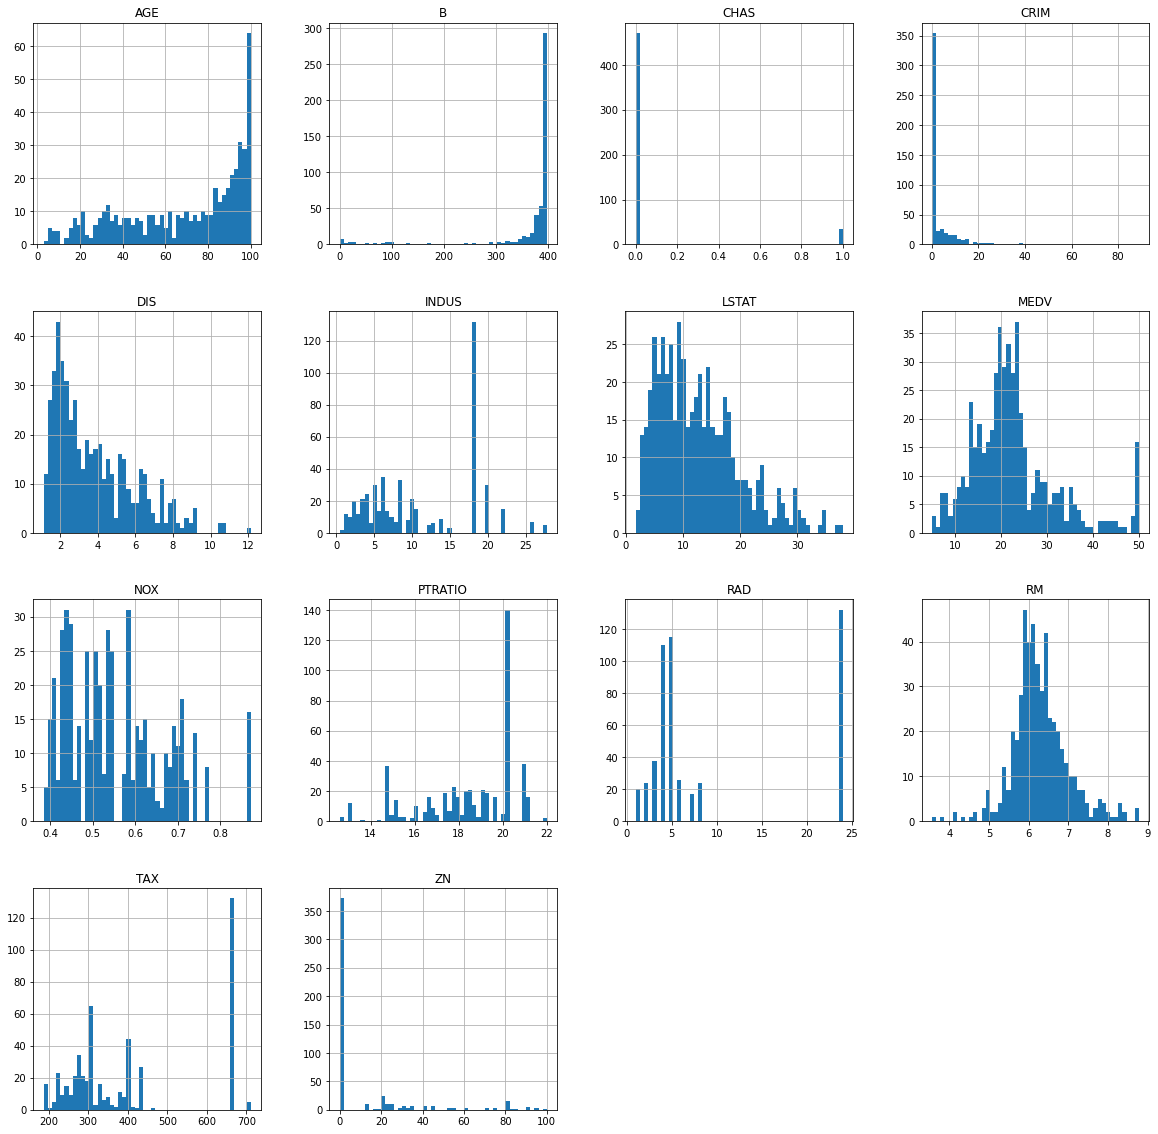

In [58]:
## drawing the histogram.
## to know the distribution of the data accross all columns.

data.hist(bins = 50, figsize = (20,20))
plt.show()

In [59]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


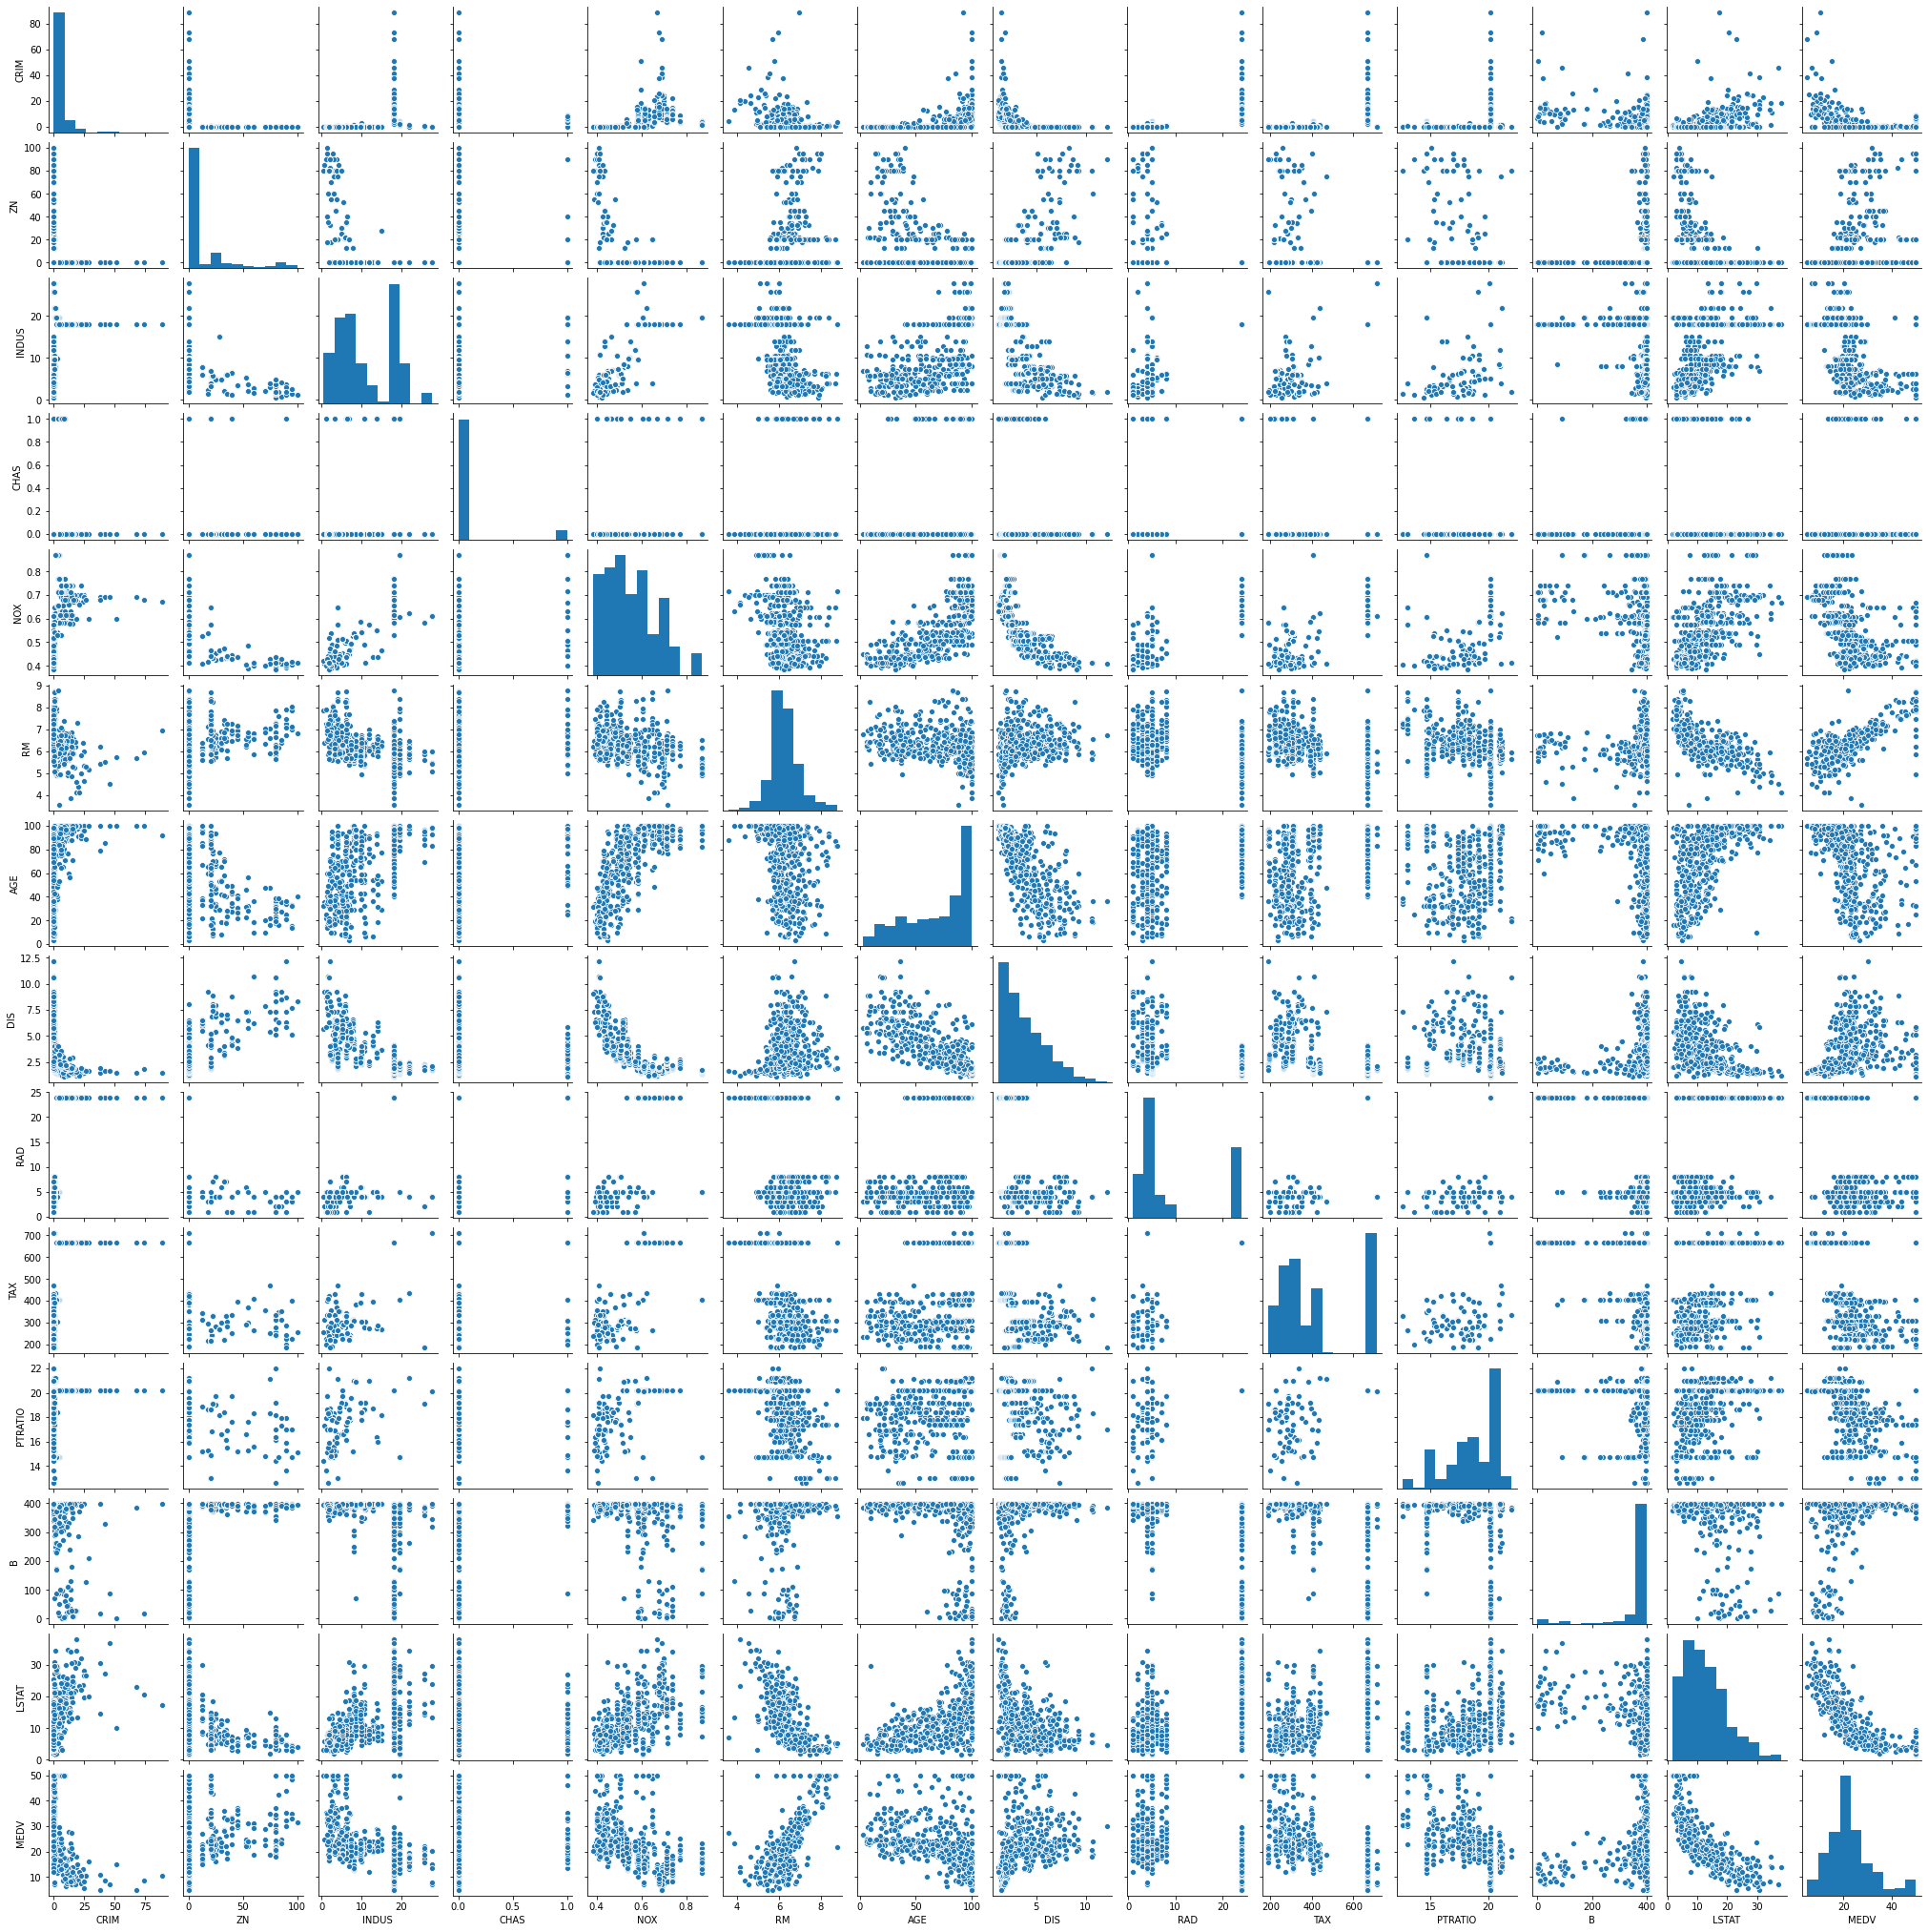

In [60]:
## drawing the pairplot.
sns.pairplot(data, height = 2)
plt.show()

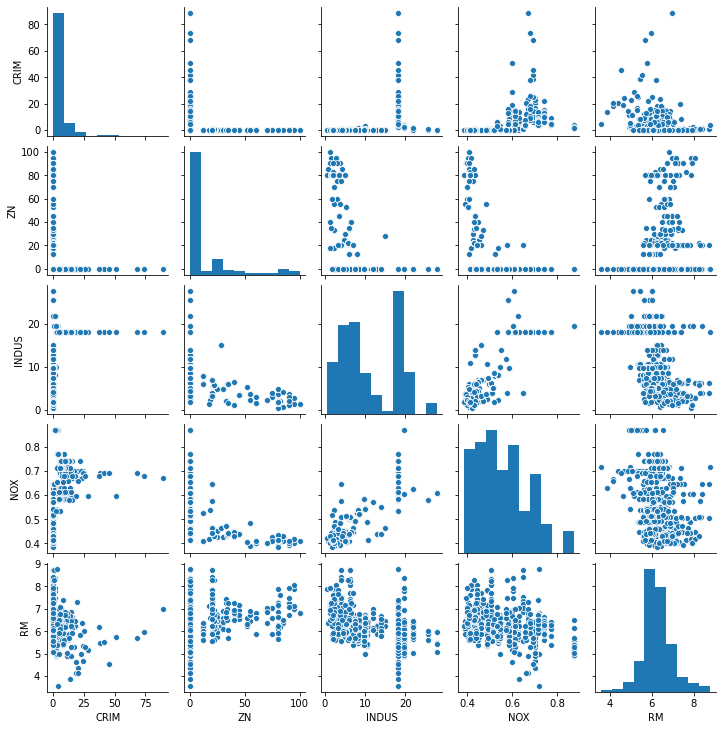

In [61]:
## import attributes here are taking as
## "CRIM", "ZN", "INDUS", "NOX", "RM"

col_study = ["CRIM", "ZN", "INDUS", "NOX", "RM"]
sns.pairplot(data[col_study], height = 2)
plt.show()

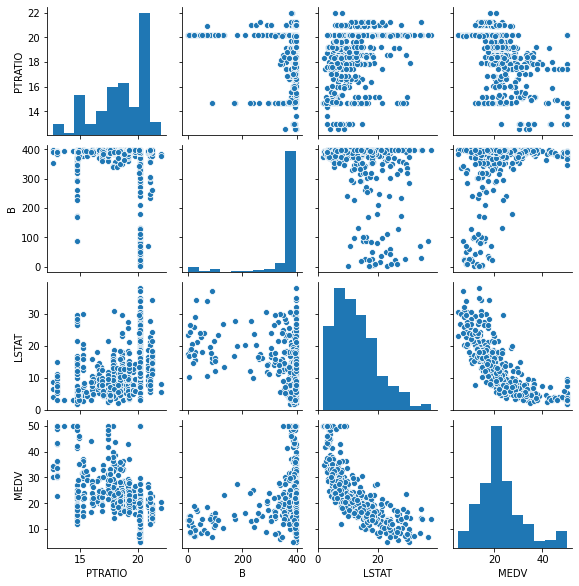

In [62]:
## plotting pairplot using other important parameters.
## ["PTRATIO","B","LSTAT","MEDV"]

col_study_2 = ["PTRATIO","B","LSTAT","MEDV"]
sns.pairplot(data[col_study_2], height = 2)
plt.show()

### Correlation and Feature Selection.

In [64]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


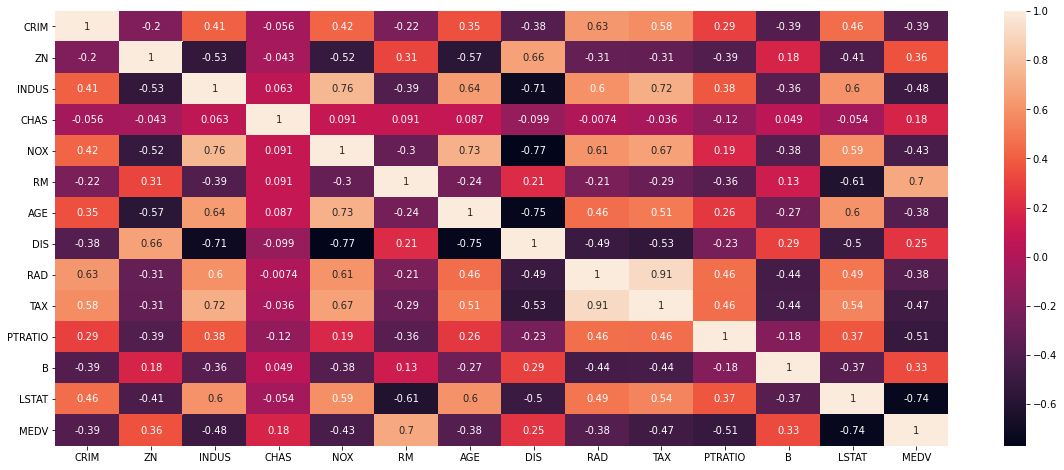

In [70]:
## drawing the heat map.
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

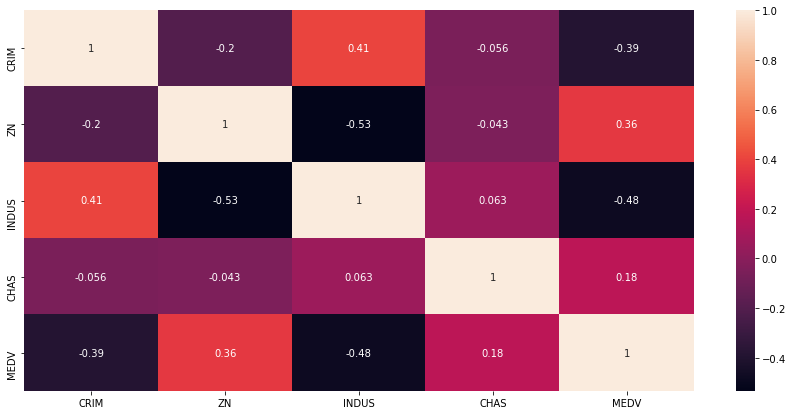

In [90]:
attributes = ["CRIM","ZN","INDUS","CHAS","MEDV"]
plt.figure(figsize = (15,7))
sns.heatmap(data[attributes].corr(), annot = True)
plt.show()

In [71]:
corr_matrix = data.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

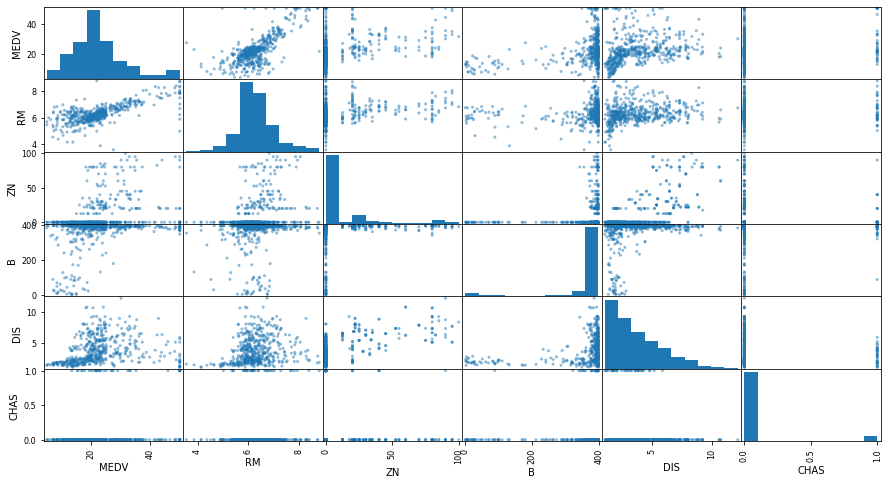

In [84]:
## plotting all the points.
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","B","DIS","CHAS"]
scatter_matrix(data[attributes], figsize = (15, 8))
plt.show()

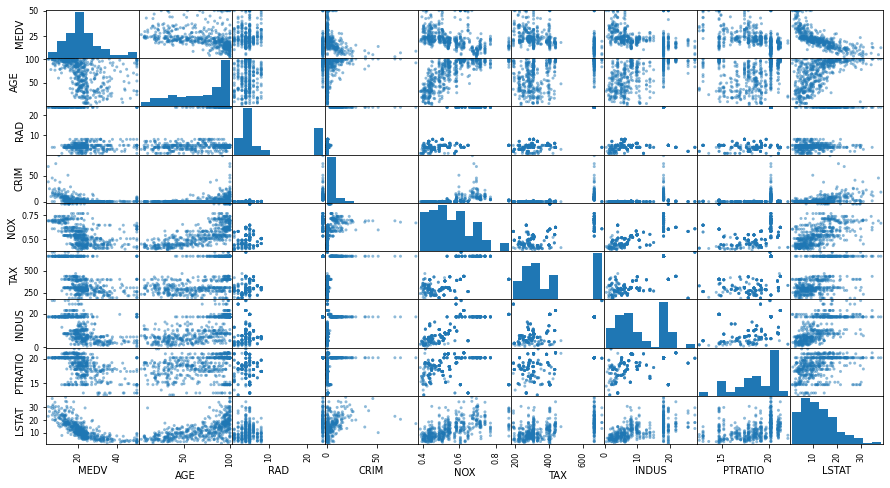

In [88]:
## negative attributes

attributes = ["MEDV","AGE","RAD","CRIM","NOX","TAX","INDUS","PTRATIO","LSTAT"]
scatter_matrix(data[attributes], figsize = (15, 8))
plt.show()

### Linear Regression with Scikit-Learn

In [94]:
data.head()

X = data["RM"].values.reshape(-1,1)
y = data["MEDV"].values

print("The RM Values shape is :--", X.shape)
print("The MEDV target Values shape is :--", y.shape)

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X,y)
print("The Coefficient of the Mdoel :--", lin_model.coef_)
print("The Intercept Value of the Model :--", lin_model.intercept_)

The RM Values shape is :-- (506, 1)
The MEDV target Values shape is :-- (506,)
The Coefficient of the Mdoel :-- [9.10210898]
The Intercept Value of the Model :-- -34.67062077643857


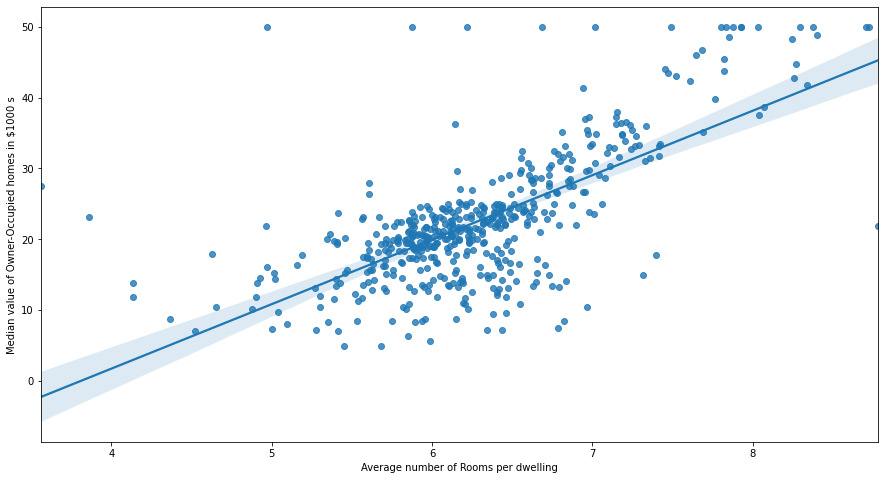

In [97]:
## draw the regression plot
plt.figure(figsize = (15, 8))
sns.regplot(X, y)
plt.xlabel("Average number of Rooms per dwelling")
plt.ylabel("Median value of Owner-Occupied homes in $1000 s")
plt.show()

<Figure size 1080x576 with 0 Axes>

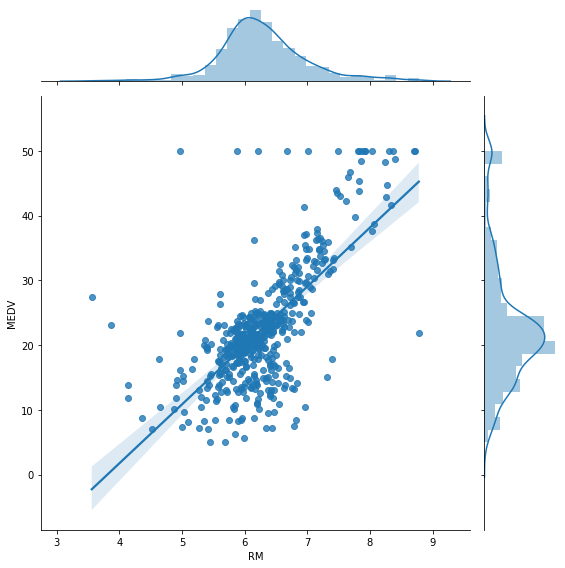

In [106]:
## another plot with regression distribution.
plt.figure(figsize = (15,8))
sns.jointplot(x = "RM", y = "MEDV", data = data, kind = "reg", height = 8)
plt.show()

Predicting with the room numbers as 5, 9 and 7

In [111]:
## predict the model using some room.
lin_model.predict(np.array([5]).reshape(1,-1))

array([10.83992413])

In [112]:
## predict the model using some room.
lin_model.predict(np.array([9]).reshape(1,-1))

array([47.24836005])

In [113]:
## predict the model using some room.
lin_model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

### Doing the Linear Modelling using "LSTAT"

[-0.95004935]
34.55384087938311


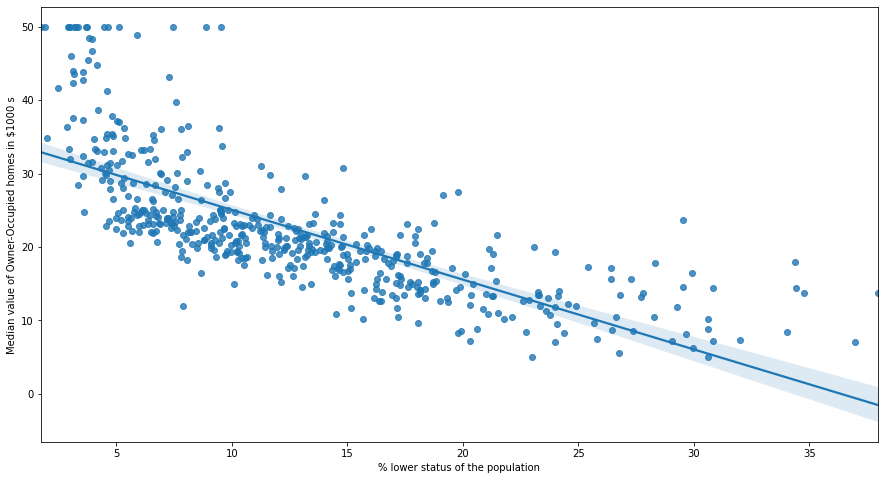

In [115]:
X = data["LSTAT"].values.reshape(-1,1)
y = data["MEDV"].values

linear_model = LinearRegression()
linear_model.fit(X, y)
print(linear_model.coef_)
print(linear_model.intercept_)

plt.figure(figsize = (15,8))
sns.regplot(X,y)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of Owner-Occupied homes in $1000 s")
plt.show()

<Figure size 1080x576 with 0 Axes>

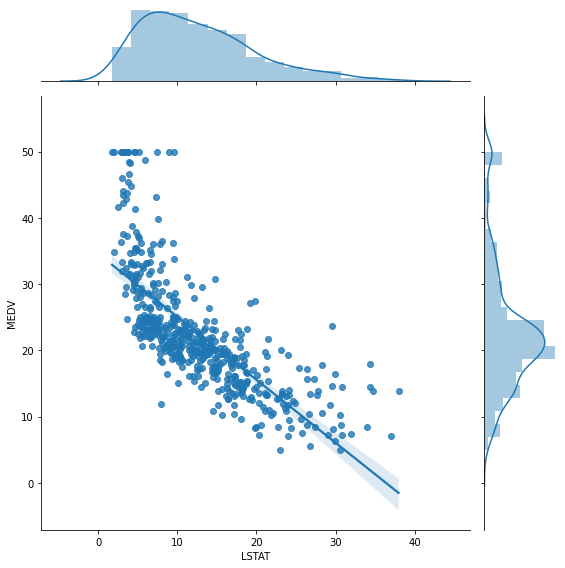

In [119]:
## another plot with regression distribution.
plt.figure(figsize = (15,8))
sns.jointplot(x = "LSTAT", y = "MEDV", data = data, kind = "reg", height = 8)
plt.show()

In [121]:
## prediction
linear_model.predict(np.array([18]).reshape(1,-1))

array([17.45295251])

### Ransac Regression

+ RANSAC (RANdom SAmple Consensus)
+ The algorithm takes linear regression algorithm to the next level by excluding the outliers in the training dataset.

In [122]:
X = data["RM"].values.reshape(-1,1)
y = data["MEDV"].values

In [123]:
from sklearn.linear_model import RANSACRegressor

ransac_model = RANSACRegressor()

ransac_model.fit(X, y)

RANSACRegressor()

In [127]:
inlier_mask = ransac_model.inlier_mask_
#print(inlier_mask)
outlier_mask = np.logical_not(inlier_mask)
#print(outlier_mask)

In [130]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac_model.predict(line_X.reshape(-1,1))
print(line_y_ransac)

[-6.87240598  2.27262217 11.41765033 20.56267849 29.70770664 38.8527348
 47.99776295]


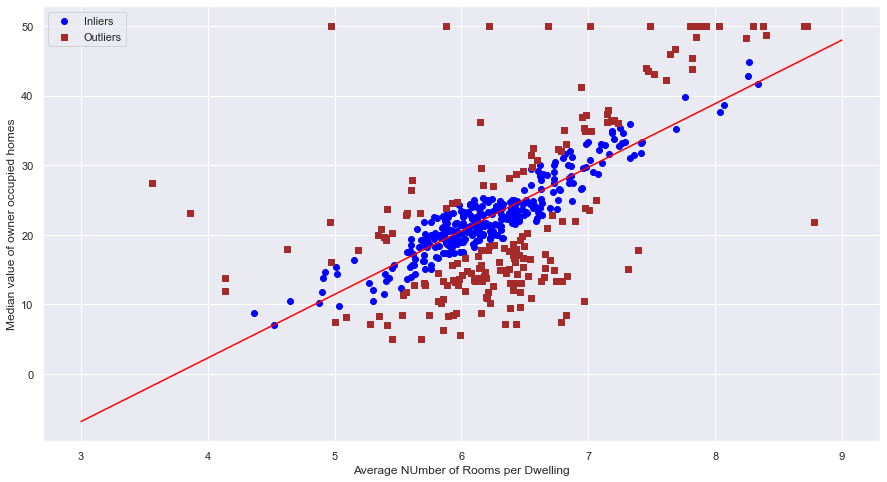

In [132]:
## plotting
sns.set(style = "darkgrid", context = "notebook")
plt.figure(figsize = (15,8))

plt.scatter(X[inlier_mask], y[inlier_mask], c = "blue", marker = "o", label = "Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], c = "brown", marker = "s", label = "Outliers")
plt.plot(line_X, line_y_ransac, color = "red")
plt.xlabel("Average NUmber of Rooms per Dwelling")
plt.ylabel("Median value of owner occupied homes")
plt.legend(loc = "upper left")
plt.show()

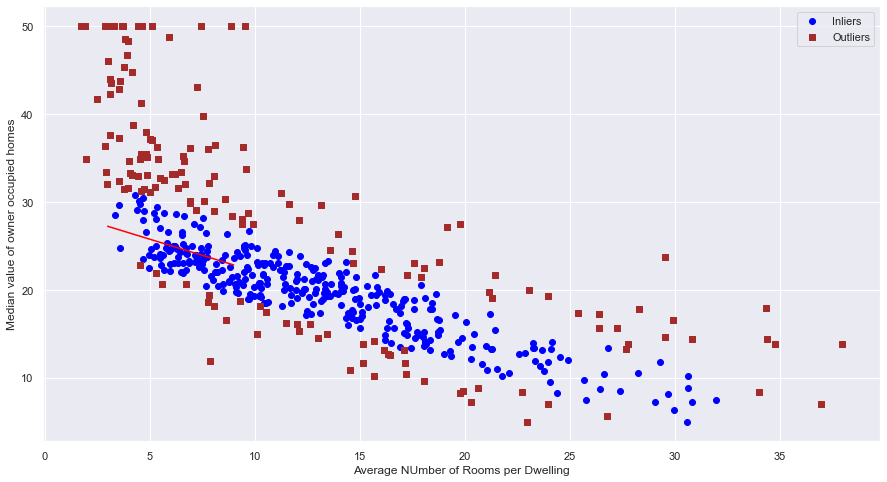

In [136]:
X = data["LSTAT"].values.reshape(-1,1)
y = data["MEDV"].values

ransac_model_2 = RANSACRegressor()

ransac_model_2.fit(X, y)

inlier_mask = ransac_model_2.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3,10,1)
line_y_ransac = ransac_model_2.predict(line_X.reshape(-1,1))

## plotting
sns.set(style = "darkgrid", context = "notebook")
plt.figure(figsize = (15,8))

plt.scatter(X[inlier_mask], y[inlier_mask], c = "blue", marker = "o", label = "Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], c = "brown", marker = "s", label = "Outliers")
plt.plot(line_X, line_y_ransac, color = "red")
plt.xlabel("Average NUmber of Rooms per Dwelling")
plt.ylabel("Median value of owner occupied homes")
plt.legend(loc = "upper right")
plt.show()

### Evaluate the Regression Model Perfomance

In [137]:
from sklearn.model_selection import train_test_split

In [147]:
X = data.iloc[:,:-1].values
y = data["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

(404, 13)
(102, 13)
(404,)
(102,)


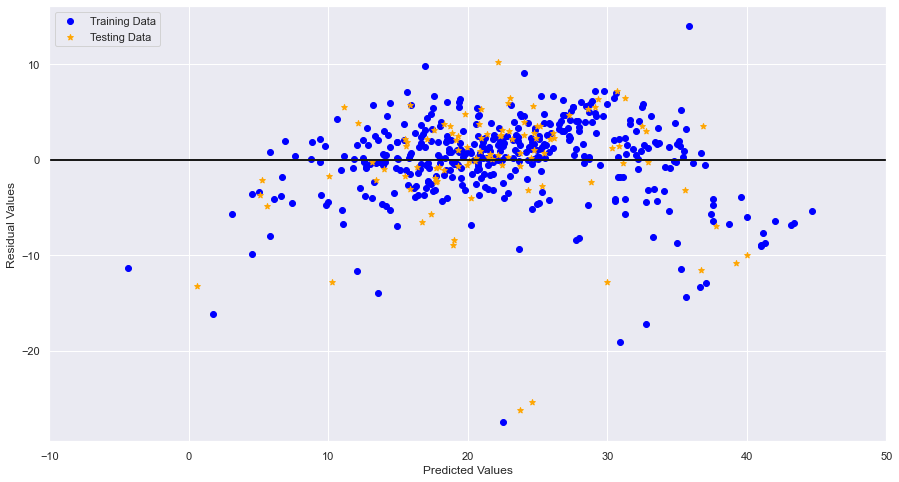

In [150]:
## Residual Analysis.
plt.figure(figsize = (15,8))
plt.scatter(y_train_predict, y_train_predict-y_train, c = "blue", marker = "o", label = "Training Data")
plt.scatter(y_test_predict, y_test_predict-y_test, c = "orange", marker = "*", label = "Testing Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")
plt.legend(loc = "upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color="k")
plt.xlim([-10,50])
plt.show()

In [155]:
## Mean Squared Error method.
from sklearn.metrics import mean_squared_error
print("The MSE on the Training Set :---", mean_squared_error(y_train, y_train_predict))
print("The MSE on Test Set :---", mean_squared_error(y_test, y_test_predict))

The MSE on the Training Set :--- 19.326470203585725
The MSE on Test Set :--- 33.448979997676524


In [156]:
## r2 score method
from sklearn.metrics import r2_score
print("The Score for Training Set :--", r2_score(y_train, y_train_predict))
print("The Score for Testing Set :--", r2_score(y_test, y_test_predict))

The Score for Training Set :-- 0.7730135569264234
The Score for Testing Set :-- 0.5892223849182509


### Perfect Model is like

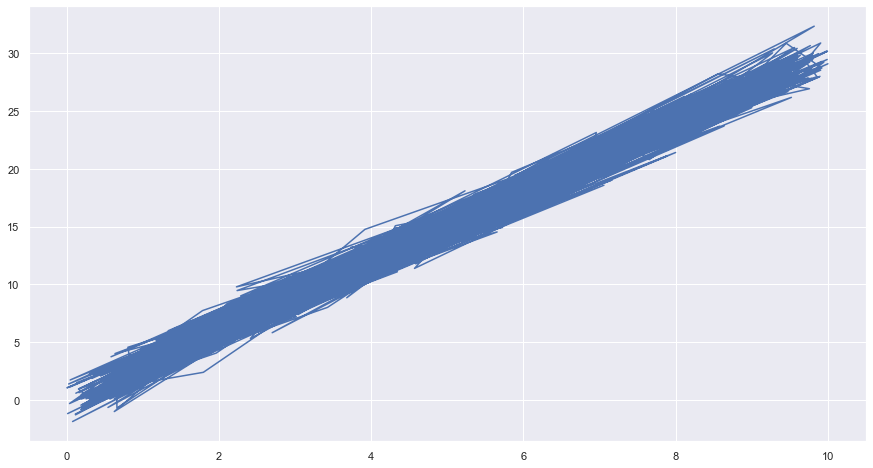

In [166]:
generate_random = np.random.RandomState(0)
X = 10 * generate_random.rand(1000)
y = 3 * X + np.random.randn(1000)
plt.figure(figsize = (15,8))
plt.plot(X,y)
plt.show()

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

lr_model = LinearRegression()

lr_model.fit(X_train.reshape(-1,1), y_train)

y_train_predict = lr_model.predict(X_train.reshape(-1,1))
y_test_predict = lr_model.predict(X_test.reshape(-1,1))



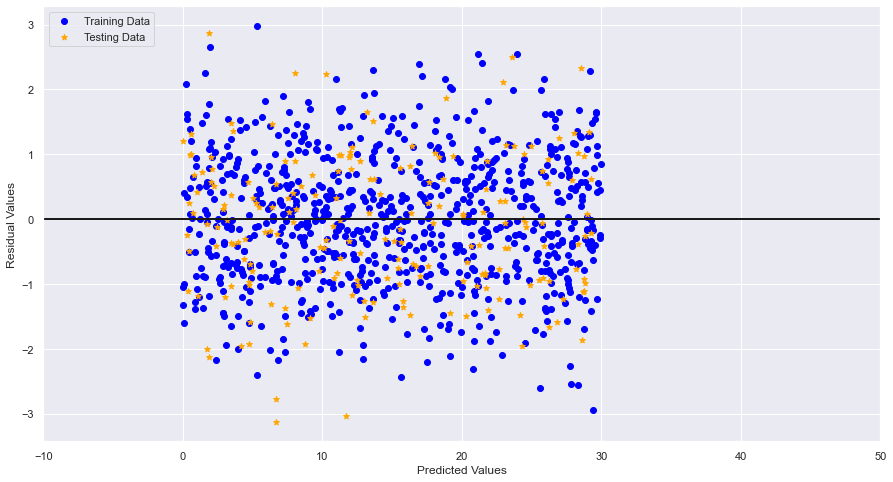

In [168]:
## Residual Analysis.
plt.figure(figsize = (15,8))
plt.scatter(y_train_predict, y_train_predict-y_train, c = "blue", marker = "o", label = "Training Data")
plt.scatter(y_test_predict, y_test_predict-y_test, c = "orange", marker = "*", label = "Testing Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")
plt.legend(loc = "upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color="k")
plt.xlim([-10,50])
plt.show()

In [169]:
## Mean Squared Error method.
from sklearn.metrics import mean_squared_error
print("The MSE on the Training Set :---", mean_squared_error(y_train, y_train_predict))
print("The MSE on Test Set :---", mean_squared_error(y_test, y_test_predict))

The MSE on the Training Set :--- 0.9598739505030474
The MSE on Test Set :--- 1.1215685764045156


In [171]:
## r2 score method
from sklearn.metrics import r2_score
print("The Score for Training Set :--", r2_score(y_train, y_train_predict))
print("The Score for Testing Set :--", r2_score(y_test, y_test_predict))

The Score for Training Set :-- 0.9873824713638488
The Score for Testing Set :-- 0.9859338709087868
